<a href="https://colab.research.google.com/github/martinez-ie/Dashboard-Power-BI-Aumento-de-faturamento-e-vendas/blob/main/RID138056_Organizando_e_analisando_dados_de_um_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Desafio: Organizando e analisando dados de um Airbnb

# **ETAPA 1 – Carregando os Dados**

Importar os dados e entender a estrutura inicial.

- Garantir que os arquivos foram carregados corretamente

- Entender como as colunas estão organizadas

- Verificar se os tipos de dados fazem sentido

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os datasets
listings = pd.read_csv('//content/listings_cleaned.csv')
reviews = pd.read_csv('/content/reviews.csv')

# Visualizando as primeiras linhas
listings.head()
reviews.head()

,id,number_of_reviews,review_scores_rating
0,272335,367,4.92
1,272631,32,5.00
2,273363,5,5.00
3,273463,654,4.83
4,273496,60,4.80


In [4]:
# Fazendo o merge atraves da coluna id, que é a ligação entre as duas colunas.
# Usando o inner para garantir que só fiquem imóveis que tenham informações completas em ambos os datasets.

df = pd.merge(listings, reviews, on='id', how='inner')
df.head()


,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.920000
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.000000
2,273261,Leblon,Entire home/apt,6,3.5,3.0,3.0,6742.0,0,4.812309
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.000000
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.830000


# **ETAPA 2 – Limpeza e Tratamento**

In [5]:
df.isnull().sum()


,0
id,0
neighbourhood_cleansed,0
room_type,0
accommodates,0
bathrooms,0
bedrooms,0
beds,0
price,0
number_of_reviews,0
review_scores_rating,0


Foi realizada verificação de valores ausentes utilizando df.isnull().sum(). Como o dataset não apresentou valores nulos, não foi necessário aplicar o método dropna() ou técnicas de imputação.

In [19]:
df.info()
df['id'] = df['id'].astype('category')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32695 entries, 0 to 32694
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      32695 non-null  category
 1   neighbourhood_cleansed  32695 non-null  object  
 2   room_type               32695 non-null  object  
 3   accommodates            32695 non-null  int64   
 4   bathrooms               32695 non-null  float64 
 5   bedrooms                32695 non-null  float64 
 6   beds                    32695 non-null  float64 
 7   price                   32695 non-null  float64 
 8   number_of_reviews       32695 non-null  int64   
 9   review_scores_rating    32695 non-null  float64 
dtypes: category(1), float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [20]:
df['review_scores_rating'].describe()

,review_scores_rating
count,32695.000000
mean,4.816146
std,0.296394
min,0.000000
25%,4.812309
50%,4.830000
75%,5.000000
max,5.000000


In [18]:
df['price'].describe()

,price
count,32695.000000
mean,782.973788
std,522.337706
min,33.000000
25%,386.000000
50%,671.000000
75%,1036.000000
max,10000.000000


A análise inicial indicou ausência de valores nulos em todas as variáveis. No entanto, mesmo sem valores ausentes, foi realizada inspeção adicional de tipos de dados e estatísticas descritivas para garantir integridade e consistência do dataset.

# **ETAPA 3 – Tratamento de Outliers**

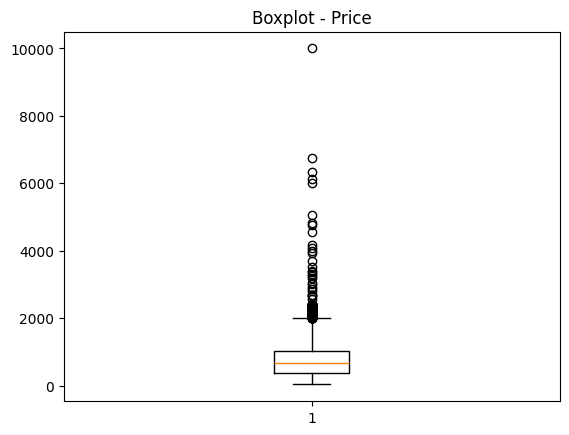

In [22]:
plt.boxplot(df['price'])
plt.title('Boxplot - Price')
plt.show()

Existem muitos pontos acima de 2000. Há imóveis chegando a quase 10.000. A distribuição é fortemente assimétrica à direita.

Imóveis padrão → preços médios

Coberturas / luxo → preços muito altos

Casas para eventos → valores extremos

In [23]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]


In [26]:
registros_antes = listings.shape[0]
registros_depois = df.shape[0]

print("Registros antes:", registros_antes)
print("Registros depois:", registros_depois)



Registros antes: 39499
Registros depois: 31772


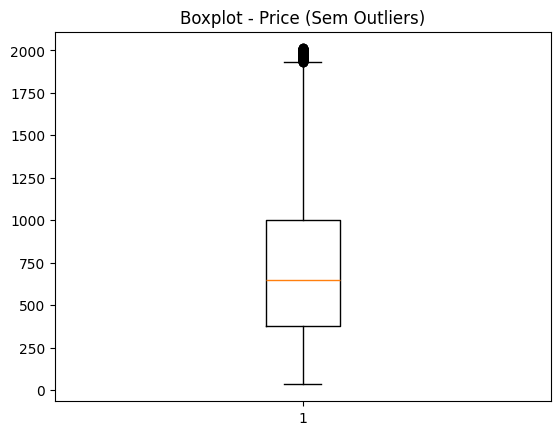

In [25]:
plt.boxplot(df['price'])
plt.title('Boxplot - Price (Sem Outliers)')
plt.show()


In [27]:
df['price'].describe()


,price
count,31772.000000
mean,739.958360
std,457.360796
min,33.000000
25%,379.000000
50%,650.000000
75%,1000.000000
max,2011.000000


A variável price apresentou valores extremos que distorciam a distribuição. Aplicou-se o método do Intervalo Interquartil (IQR) para definir limites estatísticos aceitáveis. Registros fora desse intervalo foram removidos, resultando em uma base mais estável e adequada para modelagem.

# **ETAPA 4 – Transformando Dados Categóricos**

In [28]:
df['room_type_code'] = df['room_type'].astype('category').cat.codes
df['neighbourhood_code'] = df['neighbourhood_cleansed'].astype('category').cat.codes


In [29]:
df[['room_type', 'room_type_code']].head()
df[['neighbourhood_cleansed', 'neighbourhood_code']].head()


,neighbourhood_cleansed,neighbourhood_code
0,Copacabana,31
1,Copacabana,31
3,Santa Teresa,120
4,Lagoa,74
5,Leblon,76


As variáveis categóricas foram convertidas em códigos numéricos utilizando .astype('category').cat.codes, permitindo sua utilização em modelos matemáticos, mantendo as colunas originais para interpretação dos resultados.

# **ETAPA 5 – Conferência Final e Preparação para Modelagem**

In [31]:
df.head()

,id,neighbourhood_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_code,neighbourhood_code
0,272335,Copacabana,Entire home/apt,4,1.0,1.0,1.0,723.0,367,4.92,0,31
1,272631,Copacabana,Private room,2,1.0,1.0,2.0,1146.0,32,5.00,2,31
3,273363,Santa Teresa,Private room,1,1.0,1.0,1.0,61.0,5,5.00,2,120
4,273463,Lagoa,Entire home/apt,6,2.0,2.0,6.0,1411.0,654,4.83,0,74
5,273496,Leblon,Entire home/apt,6,2.5,2.0,5.0,703.0,60,4.80,0,76


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31772 entries, 0 to 32694
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      31772 non-null  category
 1   neighbourhood_cleansed  31772 non-null  object  
 2   room_type               31772 non-null  object  
 3   accommodates            31772 non-null  int64   
 4   bathrooms               31772 non-null  float64 
 5   bedrooms                31772 non-null  float64 
 6   beds                    31772 non-null  float64 
 7   price                   31772 non-null  float64 
 8   number_of_reviews       31772 non-null  int64   
 9   review_scores_rating    31772 non-null  float64 
 10  room_type_code          31772 non-null  int8    
 11  neighbourhood_code      31772 non-null  int16   
dtypes: category(1), float64(5), int16(1), int64(2), int8(1), object(2)
memory usage: 3.8+ MB


In [33]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,room_type_code,neighbourhood_code
count,31772.000000,31772.0000,31772.000000,31772.000000,31772.000000,31772.000000,31772.000000,31772.000000,31772.000000
mean,3.693252,1.3671,1.387952,2.153311,739.958360,24.112741,4.815979,0.425060,50.619508
std,1.899247,0.7119,0.841544,1.626848,457.360796,46.395426,0.297785,0.830901,36.843779
min,1.000000,0.0000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.0000,1.000000,1.000000,379.000000,1.000000,4.812309,0.000000,31.000000
50%,4.000000,1.0000,1.000000,2.000000,650.000000,6.000000,4.830000,0.000000,31.000000
75%,4.000000,2.0000,2.000000,3.000000,1000.000000,26.000000,5.000000,0.000000,71.000000
max,16.000000,20.0000,26.000000,50.000000,2011.000000,710.000000,5.000000,3.000000,151.000000


In [35]:
df.columns

Index(['id', 'neighbourhood_cleansed', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews',
       'review_scores_rating', 'room_type_code', 'neighbourhood_code'],
      dtype='object')

A remoção dos outliers reduziu a assimetria da variável price, tornando a distribuição mais estável para futuras análises estatísticas e modelagem preditiva.O dataset final apresenta consistência estrutural, ausência de valores nulos e variáveis devidamente tratadas, estando pronto para análises exploratórias e modelagem.